## Setup

In [1]:
from causallearn.search.ConstraintBased.PC import pc
import pandas as pd
import os
from IPython.display import display
from causallearn.utils.GraphUtils import GraphUtils

/Users/nathanluskey/opt/anaconda3/envs/causal_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Get File Paths
google_drive_path = "/Users/nathanluskey/Library/CloudStorage/GoogleDrive-nluskey@andrew.cmu.edu/My Drive/80816_Project/Data/"

filename = "ChurnForBankCustomers_optbinning.csv"

full_filename = os.path.join(google_drive_path, filename)

assert os.path.isfile(full_filename)

In [3]:
# Convert dataframe to numpy array
df = pd.read_csv(full_filename)
display(df.dtypes)
display(df.head(5))

CreditScore         int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance             int64
NumOfProducts       int64
HasCrCard            bool
IsActiveMember       bool
EstimatedSalary     int64
Exited               bool
dtype: object

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2,France,Female,6,1,0,0,True,True,3,True
1,2,Spain,Female,6,0,1,0,False,True,4,False
2,1,France,Female,6,4,6,1,True,False,4,True
3,5,France,Female,5,0,0,1,False,False,3,False
4,7,Spain,Female,7,1,5,0,True,True,2,False


In [4]:
for col in df.columns:
    unique_vals = sorted(df[col].unique())
    data_to_num = {data: num for num, data in enumerate(unique_vals)}
    df[col] = df[col].map(data_to_num)

display(df.dtypes)
display(df.head(5))

CreditScore        int64
Geography          int64
Gender             int64
Age                int64
Tenure             int64
Balance            int64
NumOfProducts      int64
HasCrCard          int64
IsActiveMember     int64
EstimatedSalary    int64
Exited             int64
dtype: object

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2,0,0,6,1,0,0,1,1,3,1
1,2,2,0,6,0,1,0,0,1,4,0
2,1,0,0,6,4,6,1,1,0,4,1
3,5,0,0,5,0,0,1,0,0,3,0
4,7,2,0,7,1,5,0,1,1,2,0


## Run PC

Depth=5, working on node 10: 100%|██████████| 11/11 [00:00<00:00, 2431.99it/s]


Green: undirected; Blue: directed; Red: bi-directed



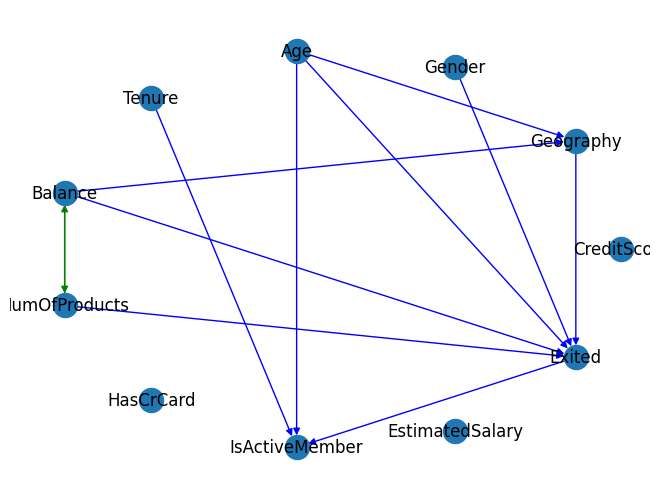

In [5]:
data = df.to_numpy()

# default parameters
cg = pc(data)

cg.labels = df.columns

# visualization using networkx
cg.to_nx_graph()
# manually change labels
cg.labels = {i:col for i, col in enumerate(df.columns)}

cg.draw_nx_graph(skel=False)